# Introduccion a matplotlib

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [212]:
l = load_iris()
df = pd.DataFrame(l['data'], columns=l.feature_names)
df['target'] = l['target']
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [213]:
print(df['petal length (cm)'])

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64


Text(0.5, 1.0, 'Petal lenght (cm)')

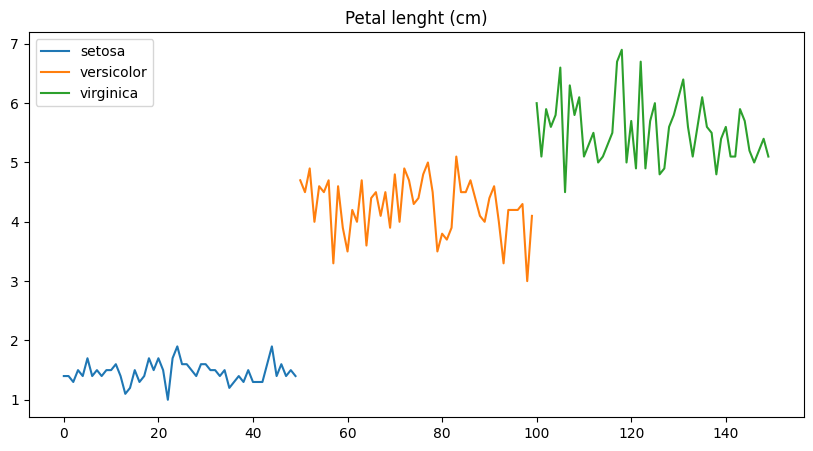

In [214]:
fig = plt.figure(figsize=(10,5))
#plt.plot(df['petal length (cm)'])
#plt.show()
#plt.plot(df.index,df['petal length (cm)'],'g')
#plt.plot(df.index, df['petal length (cm)'], color='green',
#         marker='o', linestyle='dashed',
#         linewidth=2, markersize=12)

plt.plot(df[df['target']==0]['petal length (cm)'], '-', label=l['target_names'][0])
plt.plot(df[df['target']==1]['petal length (cm)'], '-', label=l['target_names'][1])
plt.plot(df[df['target']==2]['petal length (cm)'], '-', label=l['target_names'][2])
plt.legend()
plt.title('Petal lenght (cm)')
#plt.show()

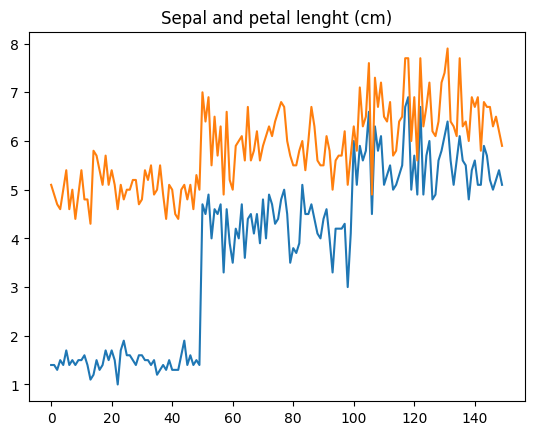

In [215]:
plt.title('Sepal and petal lenght (cm)')
plt.plot(df['petal length (cm)'])
plt.plot(df['sepal length (cm)'])
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(0, 0)
sepal length (cm)
(0, 1)
sepal width (cm)
(1, 0)
petal length (cm)
(1, 1)
petal width (cm)


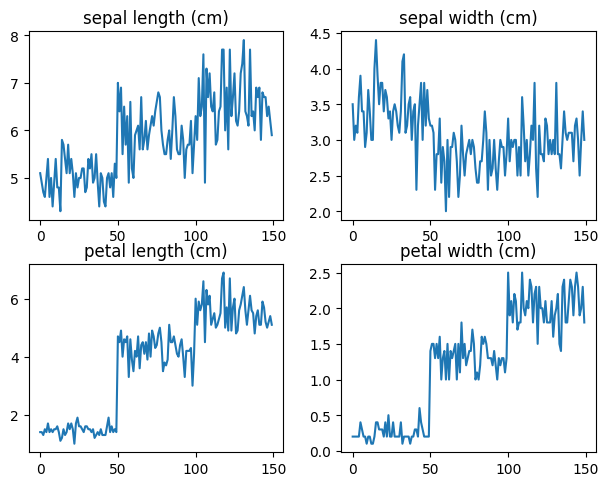

In [216]:
names = l['feature_names']
print(names)
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

axs[0,0].title.set_text(names[0])

for an,n in zip(((0,0),(0,1),(1,0),(1,1)),names):
    print(an)
    print(n)
    axs[an].title.set_text(n)
    axs[an].plot(df[n])
    

Text(0, 0.5, 'sepal length (cm)')

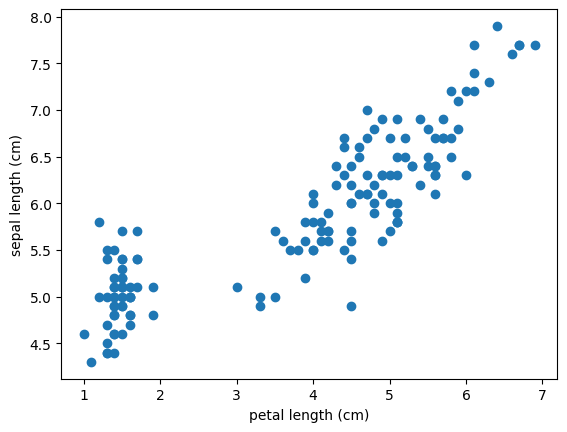

In [217]:
plt.plot(df['petal length (cm)'],df['sepal length (cm)'],'o')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')

Text(0, 0.5, 'sepal length (cm)')

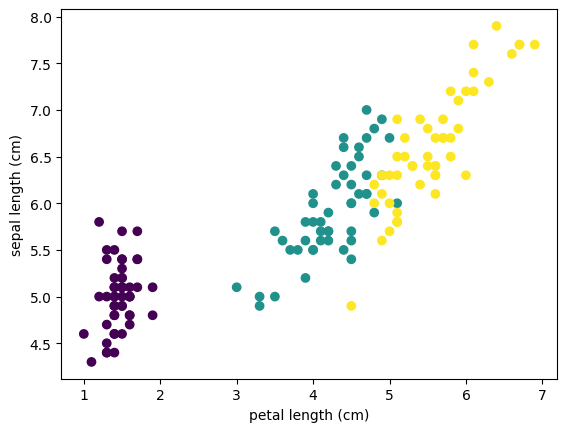

In [218]:
plt.scatter(df['petal length (cm)'], df['sepal length (cm)'],c=df['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')

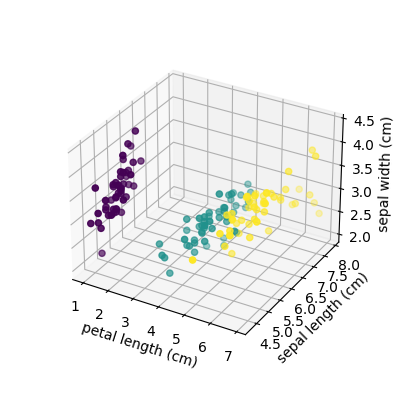

In [219]:

fig = plt.figure(figsize=(20,5))
ax = plt.axes(projection='3d')
ax.scatter(df['petal length (cm)'], 
           df['sepal length (cm)'], 
           df['sepal width (cm)'],
           c=df['target'])
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('sepal length (cm)')
ax.set_zlabel('sepal width (cm)')
ax.set_box_aspect(None, zoom=0.8) #TODO fix visibilidad nombre de los ejes
plt.show()


# Grafico de barras

In [220]:
df.groupby(['target']).size()

target
0    50
1    50
2    50
dtype: int64

In [221]:
cantidad_de_ejemplos = df.groupby(['target']).size().to_list()

In [222]:
cantidad_de_ejemplos

[50, 50, 50]

In [223]:
clases_n = df.groupby(['target']).size().index.to_list()
clases_n

[0, 1, 2]

In [224]:
labels = l['target_names']
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [225]:
clases = [labels[n] for n in clases_n]
clases

['setosa', 'versicolor', 'virginica']

<BarContainer object of 3 artists>

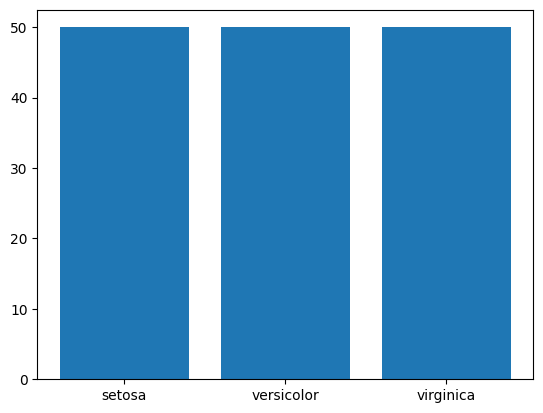

In [226]:
plt.bar(clases,cantidad_de_ejemplos)

In [227]:
!wget -O covid_data.csv https://covid19.who.int/WHO-COVID-19-global-data.csv

--2023-09-01 02:39:08--  https://covid19.who.int/WHO-COVID-19-global-data.csv
Resolving covid19.who.int (covid19.who.int)... 18.65.229.60, 18.65.229.26, 18.65.229.10, ...
Connecting to covid19.who.int (covid19.who.int)|18.65.229.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14411599 (14M) [text/csv]
Saving to: ‘covid_data.csv’

covid_data.csv      100%[===================>]  13.74M  66.5MB/s    in 0.2s    

2023-09-01 02:39:09 (66.5 MB/s) - ‘covid_data.csv’ saved [14411599/14411599]



In [228]:
df = pd.read_csv("covid_data.csv")

In [229]:
#df.head()
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
316627,2023-08-26,ZW,Zimbabwe,AFRO,0,265721,0,5715
316628,2023-08-27,ZW,Zimbabwe,AFRO,0,265721,0,5715
316629,2023-08-28,ZW,Zimbabwe,AFRO,0,265721,0,5715
316630,2023-08-29,ZW,Zimbabwe,AFRO,0,265721,0,5715
316631,2023-08-30,ZW,Zimbabwe,AFRO,0,265721,0,5715


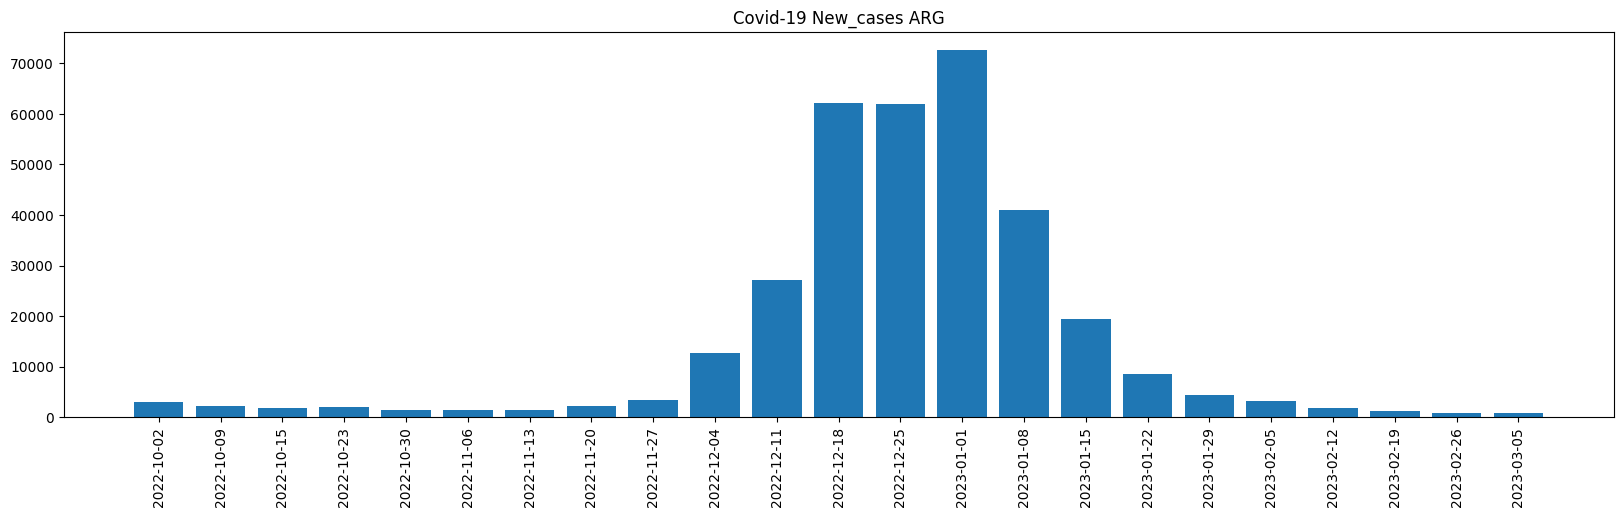

In [230]:
plt.figure(figsize=(20,5))
filtered = df[(df['Country_code']=='AR')&(df['New_cases']>0)&(df['Date_reported']>'2022-10-01')]
plt.title('Covid-19 New_cases ARG')
plt.xticks(rotation=90)
plt.bar(filtered['Date_reported'],filtered['New_cases']);


In [231]:
import numpy as np 

[[1 2 3]
 [4 5 6]]
(2, 3)
[0 1]


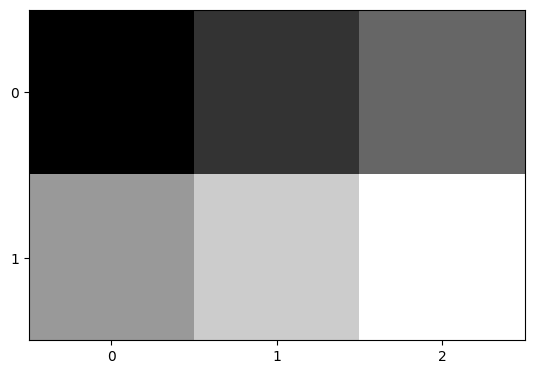

In [232]:

#m = np.array(np.mat('1 2 3; 4 5 6; 7 8 9'),dtype=float)
m = np.array([[1,2,3],[4,5,6]],dtype=int)
print(m)
print(m.shape)
print(np.arange(0, m.shape[0], 1))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, m.shape[1], 1))
ax.set_yticks(np.arange(0, m.shape[0], 1))
plt.imshow(m,cmap='gray',vmin=1,vmax=6)


In [233]:
!wget -O utn.png https://www.frba.utn.edu.ar/wp-content/uploads/2019/10/logo-UTNBA-PNC-2016-2019-e1570223041254.png

--2023-09-01 02:39:11--  https://www.frba.utn.edu.ar/wp-content/uploads/2019/10/logo-UTNBA-PNC-2016-2019-e1570223041254.png
Resolving www.frba.utn.edu.ar (www.frba.utn.edu.ar)... 200.89.153.28
Connecting to www.frba.utn.edu.ar (www.frba.utn.edu.ar)|200.89.153.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14124 (14K) [image/png]
Saving to: ‘utn.png’

utn.png             100%[===================>]  13.79K  --.-KB/s    in 0.04s   

2023-09-01 02:39:12 (366 KB/s) - ‘utn.png’ saved [14124/14124]



In [234]:
import matplotlib.image as mpimg
img = mpimg.imread("utn.png")

In [235]:
type(img)

numpy.ndarray

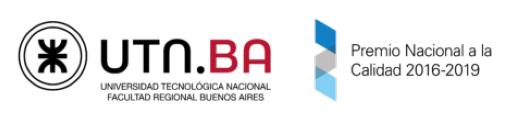

In [236]:
plt.axis("off")
plt.imshow(img);
#plt.show()

# Tutoriales matplotlib
https://matplotlib.org/stable/tutorials/introductory/quick_start.html https://matplotlib.org/stable/tutorials/introductory/pyplot.html